### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [3]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [10]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [9]:
# Confirm no missing values
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [8]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [12]:
#Count categorical values
reviews.gender.value_counts()

Female    1120
Male       880
Name: gender, dtype: int64

In [13]:
reviews.education.value_counts()

graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: education, dtype: int64

In [14]:
reviews.language.value_counts()

EN    2000
Name: language, dtype: int64

In [15]:
reviews.platform.value_counts()

Web    2000
Name: platform, dtype: int64

In [17]:
# Drop unnecessary columns.
reviews.drop(['language', 'platform'], axis=1, inplace=True)

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [18]:
# Rename the column headers.
reviews.rename(columns = {'remuneration (k£)':'remuneration', 'spending_score (1-100)':'spending_score'}, inplace = True)

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [22]:
# Create a CSV file as output.
reviews.to_csv('turtle_cust_reviews.csv', index=False)

In [23]:
# Import new CSV file with Pandas.
reviews2 = pd.read_csv('turtle_cust_reviews.csv')

# View DataFrame.
reviews2

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 5. Linear regression

### 5a) spending vs loyalty

In [24]:
# Independent variable.
x = reviews2['spending_score']

# Dependent variable.
y = reviews2['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
spend_to_loyal = ols(f, data = reviews2).fit()
spend_to_loyal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.92e-263
Time:                        18:29:36   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Extract the estimated parameters.
print("Parameters: ", spend_to_loyal.params)

# Extract the standard errors.
print("Standard errors: ", spend_to_loyal.bse)

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64


In [26]:
# Extract the predicted values.
print("Predicted values: ", spend_to_loyal.predict())

Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [29]:
# Set the X coefficient and the constant to generate the regression table.
loyalty_pred = 33.0617 * reviews2['spending_score'] - 75.0527

# View the output.
loyalty_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

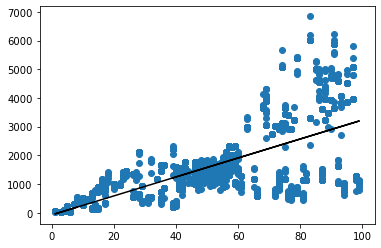

In [30]:
# Plot the graph with a regression line.
plt.scatter(x,y)  
plt.plot(x,loyalty_pred, color='black') 

### 5b) renumeration vs loyalty

In [31]:
# Independent variable.
x2 = reviews2['remuneration']

# Dependent variable.
y2 = reviews2['loyalty_points']

# OLS model and summary.
f = 'y2 ~ x2'
income_to_loyal = ols(f, data = reviews2).fit()
income_to_loyal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.43e-209
Time:                        19:35:07   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x2            34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Extract the estimated parameters.
print("Parameters: ", income_to_loyal.params)

# Extract the standard errors.
print("Standard errors: ", income_to_loyal.bse)

# Extract the predicted values.
print("Predicted values: ", income_to_loyal.predict())

Parameters:  Intercept   -65.686513
x2           34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x2            0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [33]:
# Set the X coefficient and the constant to generate the regression table.
loyalty_pred_income = 34.1878 * reviews2['remuneration'] - 65.6865

# View the output.
loyalty_pred_income

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

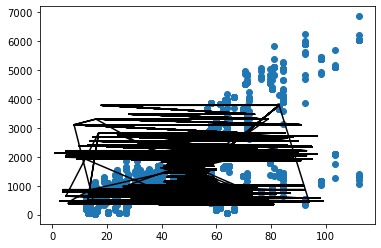

In [34]:
# Plot the graph with a regression line.
plt.scatter(x2,y2)  
plt.plot(x,loyalty_pred_income, color='black')

### 5c) age vs loyalty

In [35]:
# Independent variable.
x3 = reviews2['age']

# Dependent variable.
y3 = reviews2['loyalty_points']

# OLS model and summary.
f = 'y3 ~ x3'
age_to_loyal = ols(f, data = reviews2).fit()
age_to_loyal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Tue, 30 Aug 2022   Prob (F-statistic):             0.0577
Time:                        19:43:08   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x3            -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Extract the estimated parameters.
print("Parameters: ", age_to_loyal.params)

# Extract the standard errors.
print("Standard errors: ", age_to_loyal.bse)

# Extract the predicted values.
print("Predicted values: ", age_to_loyal.predict())

Parameters:  Intercept    1736.517739
x3             -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x3            2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [37]:
# Set the X coefficient and the constant to generate the regression table.
loyalty_pred_age = -4.0128 * reviews2['age'] + 1736.5177

# View the output.
loyalty_pred_age

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

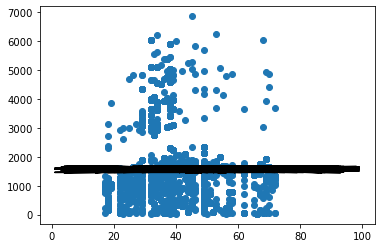

In [38]:
# Plot the graph with a regression line.
plt.scatter(x3,y3)  
plt.plot(x,loyalty_pred_age, color='black') 

## 6. Observations and insights

***From the three simple linear regressions summaries we can conclude that none of the 3 vraiables (i.e. spending, remuneration, age) can predict well the loyalty score. This is due to the fact that R-squared is far below an accepted threshold of 0.60 that could indicate a strong relationship between the independents and dependent variables. That's also visilble from the high standard errors as well as the regression plots. Only the regression Spending VS Loyalty produced the most reasonable results out of the three, but still the R-squared is low, standard error with high value with insignificant p-value (>0.05), and observations in the plot too far from the regression line***

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [39]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [41]:
# Load the CSV file(s) as df2 including only the desired columns.
df2 = pd.read_csv('turtle_cust_reviews.csv', usecols = ['remuneration','spending_score'])

# View DataFrame.
df2

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [43]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [44]:
# Descriptive statistics.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

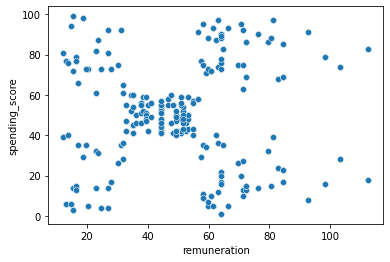

In [45]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration', y='spending_score',
                data=df2)

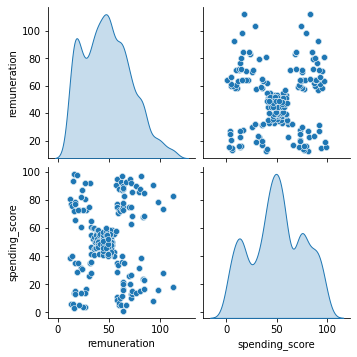

In [46]:
# Create a pairplot with Seaborn.
v = df2[['remuneration', 'spending_score']]

sns.pairplot(df2, vars=v, diag_kind= 'kde')

## 3. Elbow and silhoutte methods

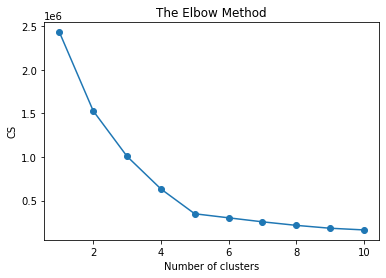

In [48]:
# Determine the number of clusters: Elbow method.

# Elbow chart for us to decide on the number of optimal clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(v)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

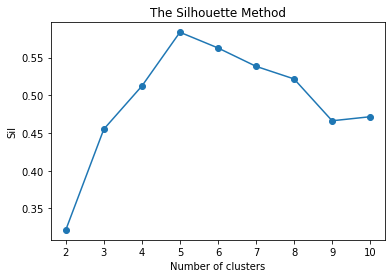

In [50]:
# Determine the number of clusters: Silhouette method.

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(v)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(v, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

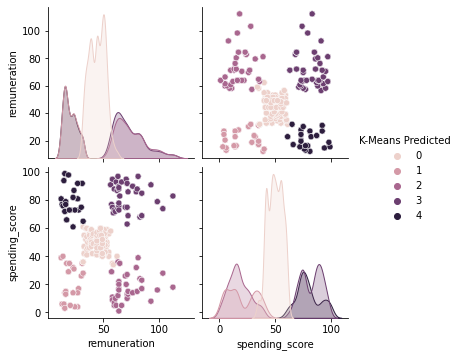

In [52]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(v)
clusters = kmeans.labels_
v['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(v, hue='K-Means Predicted', diag_kind= 'kde')

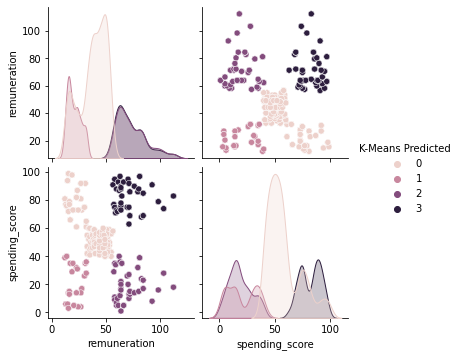

In [53]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(v)
clusters = kmeans.labels_
v['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(v, hue='K-Means Predicted', diag_kind= 'kde')

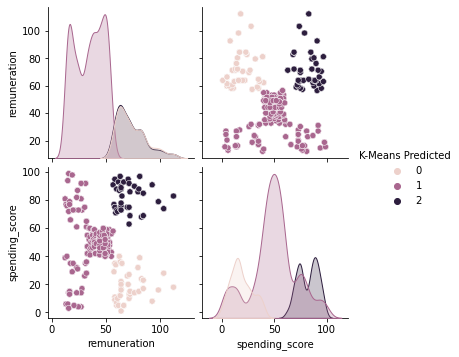

In [54]:
# Use 3 clusters:
kmeans = KMeans(n_clusters = 3, max_iter = 15000, init='k-means++', random_state=0).fit(v)
clusters = kmeans.labels_
v['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(v, hue='K-Means Predicted', diag_kind= 'kde')

## 5. Fit final model and justify your choice

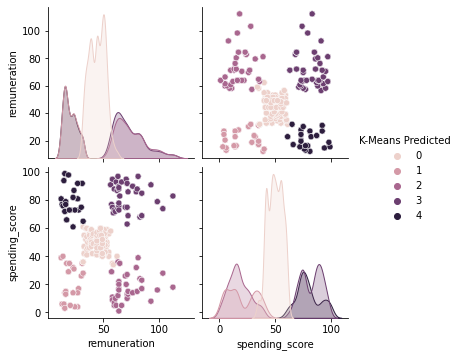

In [56]:
# Apply the final model with 5 clusters that are clearly visible and grouped
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(v)
clusters = kmeans.labels_
v['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(v, hue='K-Means Predicted', diag_kind= 'kde')

In [57]:
# Check the number of observations per predicted class.
v['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [59]:
# View the DataFrame.
v

,remuneration,spending_score,K-Means Predicted
0,12.30,39,1
1,12.30,81,4
2,13.12,6,1
3,13.12,77,4
4,13.94,40,1
...,...,...,...
1995,84.46,69,3
1996,92.66,8,2
1997,92.66,91,3
1998,98.40,16,2


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

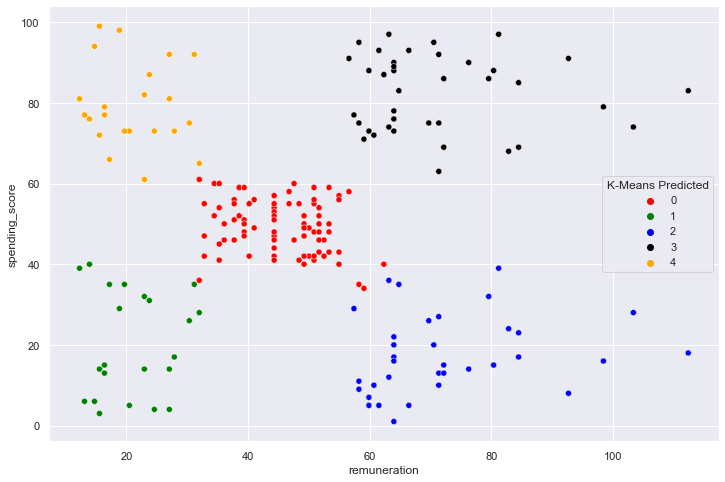

In [60]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration', 
                y ='spending_score',
                data=v , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

## 7. Discuss: Insights and observations

***Employing k-means clustering method with spending_score and remuneration the 2 variables included in the model, there were 5 clear customer segments identified. The number of customers falling into these segments are quite balanced,
except in the case of the cluster 0, where the counts are more than doubled of the rest. However this cluster seems robust as its observations are unified. We could explore further the outliers and see how our model changes in case we
remove them. Another point we could explore is how other categorical affect the clustering.***

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [62]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [86]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_cust_reviews.csv')

# View DataFrame.
df3

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [87]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [88]:
# Keep only necessary columns. Drop unnecessary columns.
df4 = df3[['review', 'summary']]

# View columns.
df4.columns

Index(['review', 'summary'], dtype='object')

In [89]:
# Determine if there are any missing values and count them.
df4.isnull().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [90]:
# Review: Change all to lower case and join with a space.
df4['review'] = df4['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [91]:
# Summary: Change all to lower case and join with a space.
df4['summary'] = df4['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [93]:
# Replace all the punctuations in review column.
df4['review'] = df4['review'].str.replace('[^\w\s]','')

# View output.
df4['review']

0       when it comes to a dms screen the space on the...
1       an open letter to galeforce9 your unpainted mi...
2       nice art nice printing why two panels are fill...
3       amazing buy bought it as a gift for our new dm...
4       as my review of gf9s previous screens these we...
                              ...                        
1995    the perfect word game for mixed ages with mom ...
1996    great game did not think i would like it when ...
1997             great game for all keeps the mind nimble
1998                                             fun game
1999    this game is fun a lot like scrabble without a...
Name: review, Length: 2000, dtype: object

In [94]:
# Replace all the puncuations in summary column.
df4['summary'] = df4['summary'].str.replace('[^\w\s]','')

# View output.
df4['summary']

0       the fact that 50 of this space is wasted on ar...
1       another worthless dungeon masters screen from ...
2                          pretty but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995        the perfect word game for mixed ages with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object

### 2c) Check for duplicate reviews to drop based on multiple columns

In [99]:
# Find duplicates based on combination of relevant columns 
df4_duplicates = df3[df3.duplicated(['review','summary','product'], keep=False)]
df4_duplicates

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
811,Female,37,15.58,99,1067,postgraduate,1183,great game,Five Stars
1006,Female,37,14.76,6,61,diploma,1183,great game,Five Stars


In [101]:
# Drop the duplicate review.
df4.drop([1006], axis=0, inplace=True)

# View DataFrame and condirm the row was deleted.
df4

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when ...,super fun
1997,great game for all keeps the mind nimble,great game
1998,fun game,four stars


## 3. Tokenise and create wordclouds

In [102]:
# Create new DataFrame (copy DataFrame).
df5 = df4.copy()

# View DataFrame.
df5

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when ...,super fun
1997,great game for all keeps the mind nimble,great game
1998,fun game,four stars


In [103]:
# Apply tokenisation to both columns.
df5['review_token'] = df5['review'].apply(word_tokenize)
df5['summary_token'] = df5['summary'].apply(word_tokenize)

# View DataFrame.
df5

,review,summary,review_token,summary_token
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"
...,...,...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w..."
1996,great game did not think i would like it when ...,super fun,"[great, game, did, not, think, i, would, like,...","[super, fun]"
1997,great game for all keeps the mind nimble,great game,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]"
1998,fun game,four stars,"[fun, game]","[four, stars]"


In [ ]:
#Reset after deleted raw
df5.reset_index(inplace=True)

#View reset dataframe
df5

,index,review,summary,review_token,summary_token
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"
...,...,...,...,...,...
1994,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w..."
1995,1996,great game did not think i would like it when ...,super fun,"[great, game, did, not, think, i, would, like,...","[super, fun]"
1996,1997,great game for all keeps the mind nimble,great game,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]"
1997,1998,fun game,four stars,"[fun, game]","[four, stars]"


In [123]:
#Drop the index column.
df5.drop('index', axis=1, inplace=True)

#View reset dataframe
df5

,review,summary,review_token,summary_token
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"
...,...,...,...,...
1994,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w..."
1995,great game did not think i would like it when ...,super fun,"[great, game, did, not, think, i, would, like,...","[super, fun]"
1996,great game for all keeps the mind nimble,great game,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]"
1997,fun game,four stars,"[fun, game]","[four, stars]"


In [125]:
#Convert lists into strings for reviews
df5['review_token_str'] = [','.join(map(str, l)) for l in df5['review_token']]
df5

,review,summary,review_token,summary_token,review_token_str
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...","when,it,comes,to,a,dms,screen,the,space,on,the..."
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...","an,open,letter,to,galeforce9,your,unpainted,mi..."
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]","nice,art,nice,printing,why,two,panels,are,fill..."
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]","amazing,buy,bought,it,as,a,gift,for,our,new,dm..."
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]","as,my,review,of,gf9s,previous,screens,these,we..."
...,...,...,...,...,...
1994,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w...","the,perfect,word,game,for,mixed,ages,with,mom,..."
1995,great game did not think i would like it when ...,super fun,"[great, game, did, not, think, i, would, like,...","[super, fun]","great,game,did,not,think,i,would,like,it,when,..."
1996,great game for all keeps the mind nimble,great game,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]","great,game,for,all,keeps,the,mind,nimble"
1997,fun game,four stars,"[fun, game]","[four, stars]","fun,game"


In [126]:
# Review: Create a word cloud.
# String all the reviews together in a single variable.
# Create an empty string variable.

all_reviews = ''

for i in range(df5.shape[0]):
    # Add each comment.
    all_reviews = all_reviews + df5['review_token_str'][i]

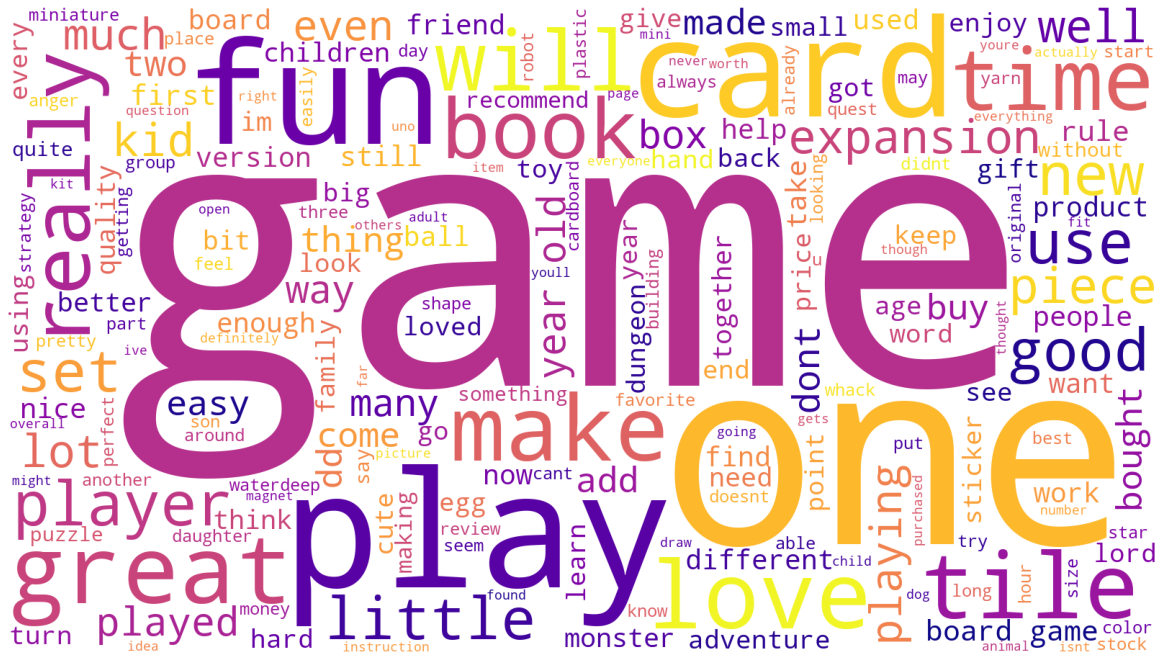

In [129]:
# Review: Plot the WordCloud image.
review_wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma',
                min_font_size = 10).generate(all_reviews)

plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(review_wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [131]:
#Convert lists into strings for summaries
df5['summary_token_str'] = [','.join(map(str, l)) for l in df5['summary_token']]
df5['summary_token_str']

0       the,fact,that,50,of,this,space,is,wasted,on,ar...
1       another,worthless,dungeon,masters,screen,from,...
2                          pretty,but,also,pretty,useless
3                                              five,stars
4                                              money,trap
                              ...                        
1994        the,perfect,word,game,for,mixed,ages,with,mom
1995                                            super,fun
1996                                           great,game
1997                                           four,stars
1998                                       love,this,game
Name: summary_token_str, Length: 1999, dtype: object

In [132]:
# Summary: Create a word cloud.
# String all the summaries together in a single variable.
# Create an empty string variable.

all_summaries = ''

for i in range(df5.shape[0]):
    # Add each comment.
    all_summaries = all_summaries + df5['summary_token_str'][i]

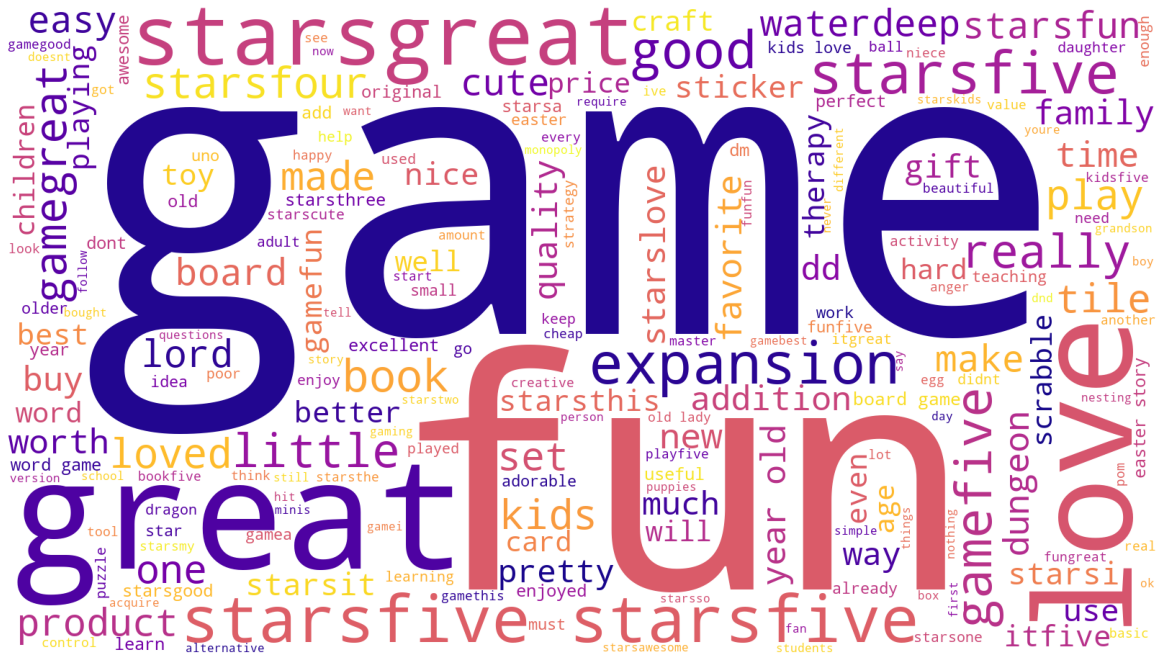

In [133]:
# Summary: Plot the WordCloud image.
saummary_wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma',
                min_font_size = 10).generate(all_summaries)

plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(saummary_wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [135]:
#View tokenized column names
df5.columns

Index(['review', 'summary', 'review_token', 'summary_token',
       'review_token_str', 'summary_token_str'],
      dtype='object')

In [152]:
#Define list of tokens for Reviews
review_tokens_list = []

for i in range(df5.shape[0]):
    # Add each token to the list.
    review_tokens_list = review_tokens_list + df5['review_token'][i]

In [156]:
#View token list of Reviews
print(review_tokens_list[0:20])

['when', 'it', 'comes', 'to', 'a', 'dms', 'screen', 'the', 'space', 'on', 'the', 'screen', 'itself', 'is', 'at', 'an', 'absolute', 'premium', 'the', 'fact']


In [157]:
#Define list of tokens for Summary
summary_tokens_list = []

for i in range(df5.shape[0]):
    # Add each token to the list.
    summary_tokens_list = summary_tokens_list + df5['summary_token'][i]

In [158]:
#View token list of Summary
print(summary_tokens_list[0:20])

['the', 'fact', 'that', '50', 'of', 'this', 'space', 'is', 'wasted', 'on', 'art', 'and', 'not', 'terribly', 'informative', 'or', 'needed', 'art', 'another', 'worthless']


In [159]:
# Determine the frequency distribution for the lists of tokens.
fdist_review = FreqDist(review_tokens_list)
fdist_summary = FreqDist(summary_tokens_list)

#View all their frequency.
fdist_review, fdist_summary

(FreqDist({'the': 5452, 'and': 3234, 'to': 3164, 'a': 3161, 'of': 2488, 'i': 2091, 'it': 2090, 'is': 1782, 'this': 1776, 'game': 1684, ...}),
 FreqDist({'stars': 465, 'five': 380, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...}))

### 4b) Remove alphanumeric characters and stopwords

In [160]:
# Delete all the alpanum.
reviews_tokens_alpha = [word for word in review_tokens_list if word.isalnum()]
summary_tokens_alpha = [word for word in summary_tokens_list if word.isalnum()]

In [161]:
# Remove all the stopwords
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

In [162]:
# Create a filtered list of tokens without stop words for Reviews.
reviews_tokens_clean = [x for x in reviews_tokens_alpha if x.lower() not in english_stopwords]

# Define an empty string variable.
reviews_tokens_clean_string = ''

for value in reviews_tokens_clean:
    # Add each filtered token word to the string.
    reviews_tokens_clean_string = reviews_tokens_clean_string + value + ' '

In [163]:
# Create a filtered list of tokens without stop words for Summary.
summary_tokens_clean = [x for x in summary_tokens_alpha if x.lower() not in english_stopwords]

# Define an empty string variable.
summary_tokens_clean_string = ''

for value in summary_tokens_clean:
    # Add each filtered token word to the string.
    summary_tokens_clean_string = summary_tokens_clean_string + value + ' '

### 4c) Create wordcloud without stopwords

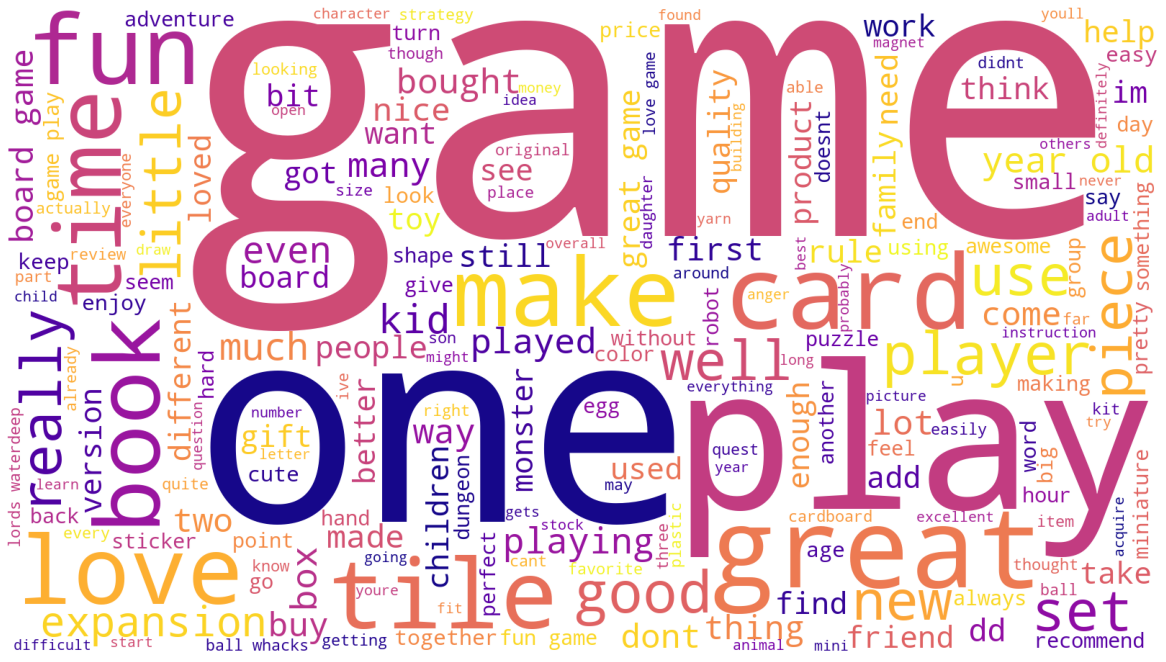

In [164]:
# Create a wordcloud without stop words for Reviews.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(reviews_tokens_clean_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

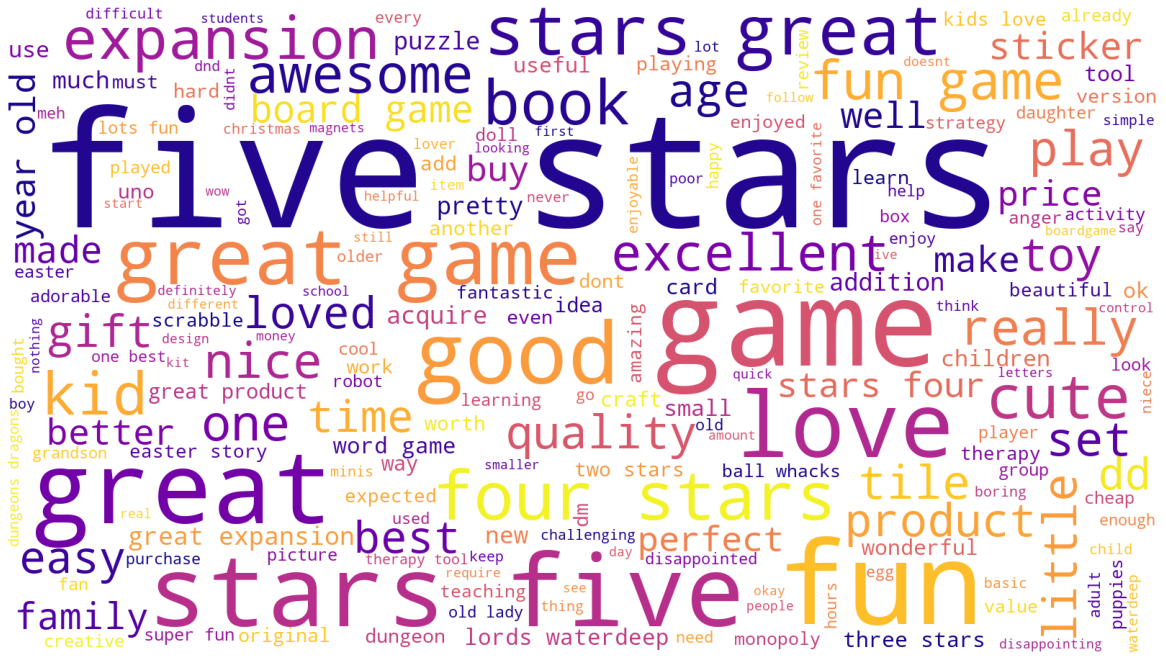

In [165]:
# Create a wordcloud without stop words for Reviews.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(summary_tokens_clean_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [166]:
# Determine the 15 most common words for Reviews.
# Generate a DataFrame from Counter.
review_counts = pd.DataFrame(Counter(reviews_tokens_clean).most_common(15),
                      columns=['Review_Word', 'Frequency']).set_index('Review_Word')

# Preview data.
review_counts

,Frequency
Review_Word,
game,1684
great,595
fun,553
one,530
play,502
like,414
love,331
really,319
get,319


In [167]:
# Determine the 15 most common words for Summary.
# Generate a DataFrame from Counter.
summary_counts = pd.DataFrame(Counter(summary_tokens_clean).most_common(15),
                      columns=['Summary_Word', 'Frequency']).set_index('Summary_Word')

# Preview data.
summary_counts

,Frequency
Summary_Word,
stars,465
five,380
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [169]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [221]:
# Determine polarity of Reviews. 
# Populate a new column with polarity scores for each comment.
df4['polarity_reviews'] = df5['review'].apply(generate_polarity)

# Preview the result.
df4['polarity_reviews']

0      -0.036111
1       0.035952
2       0.116640
3       0.578788
4      -0.316667
          ...   
1995    0.158333
1996    0.200000
1997   -0.050000
1998   -0.095833
1999         NaN
Name: polarity_reviews, Length: 1999, dtype: float64

In [223]:
# Count polarity values.
df4['polarity_reviews'].value_counts()

0.500000    83
0.000000    81
0.300000    53
0.800000    51
0.700000    37
            ..
0.326667     1
0.542500     1
0.433333     1
0.210101     1
0.155208     1
Name: polarity_reviews, Length: 1164, dtype: int64

In [224]:
# Determine polarity of Summary. 
# Populate a new column with polarity scores for each comment.
df4['polarity_summary'] = df5['summary'].apply(generate_polarity)

# Preview the result.
df4['polarity_summary']

0       0.150000
1      -0.800000
2       0.000000
3       0.000000
4       0.000000
          ...   
1995    0.316667
1996    0.200000
1997    0.000000
1998    0.050000
1999         NaN
Name: polarity_summary, Length: 1999, dtype: float64

In [225]:
# Count polarity values.
df4['polarity_summary'].value_counts()

0.000000    748
0.500000    134
0.800000    130
0.300000    121
0.200000     74
           ... 
0.308333      1
0.816667      1
0.437500      1
0.625000      1
0.088889      1
Name: polarity_summary, Length: 248, dtype: int64

In [179]:
# Determine subjectivity of Reviews and Summaries
# Define a function to extract a subjectivity scores.
def generate_subjectivity(comment2):
    return TextBlob(comment2).sentiment[1]

In [226]:
# Populate a new column with subjectivity scores for each review.
df4['subjectivity_reviews'] = df5['review'].apply(generate_subjectivity)

# Preview the result.
df4['subjectivity_reviews'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity_reviews, dtype: float64

In [227]:
# Count subjectivity values.
df4['subjectivity_reviews'].value_counts()

0.000000    71
1.000000    68
0.750000    67
0.600000    56
0.500000    54
            ..
0.530810     1
0.467310     1
0.619048     1
0.386667     1
0.310043     1
Name: subjectivity_reviews, Length: 1033, dtype: int64

In [228]:
# Populate a new column with subjectivity scores for each summary.
df4['subjectivity_summary'] = df5['summary'].apply(generate_subjectivity)

# Preview the result.
df4['subjectivity_summary'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity_summary, dtype: float64

In [229]:
# Count subjectivity values.
df4['subjectivity_summary'].value_counts()

0.000000    719
0.750000    152
1.000000    148
0.200000     93
0.500000     85
           ... 
0.283333      1
0.612500      1
0.966667      1
0.566667      1
0.661111      1
Name: subjectivity_summary, Length: 172, dtype: int64

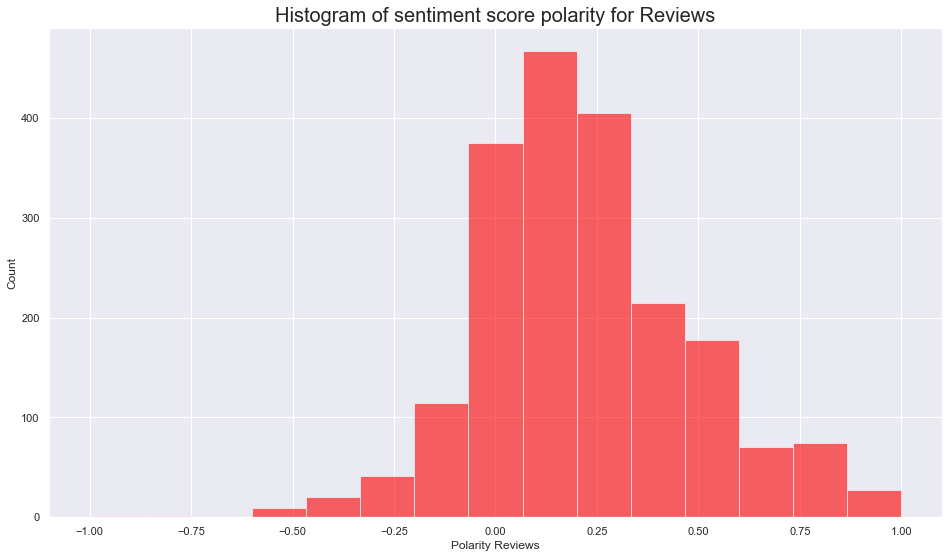

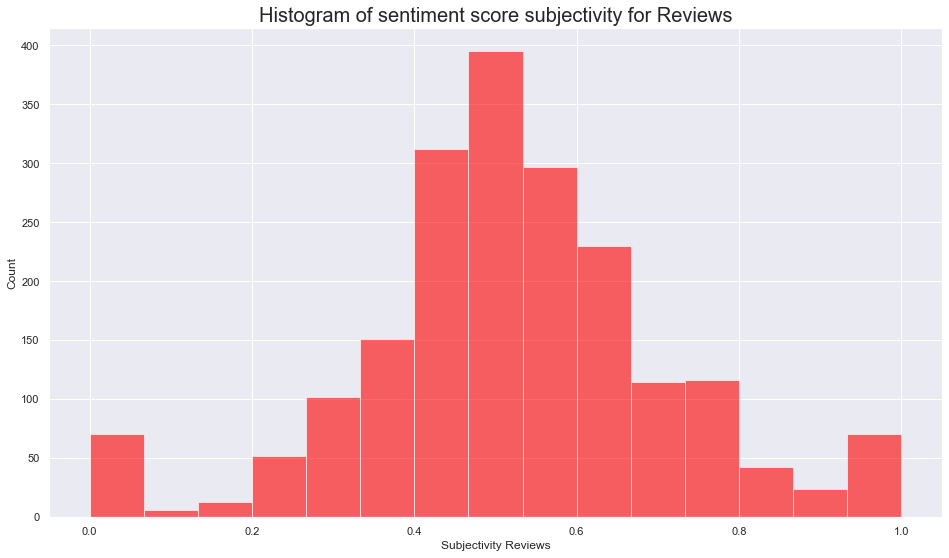

In [270]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['polarity_reviews'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity Reviews', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for Reviews', fontsize=20)

plt.show();

# Histogram of sentiment score
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['subjectivity_reviews'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity Reviews', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity for Reviews', fontsize=20)

plt.show();

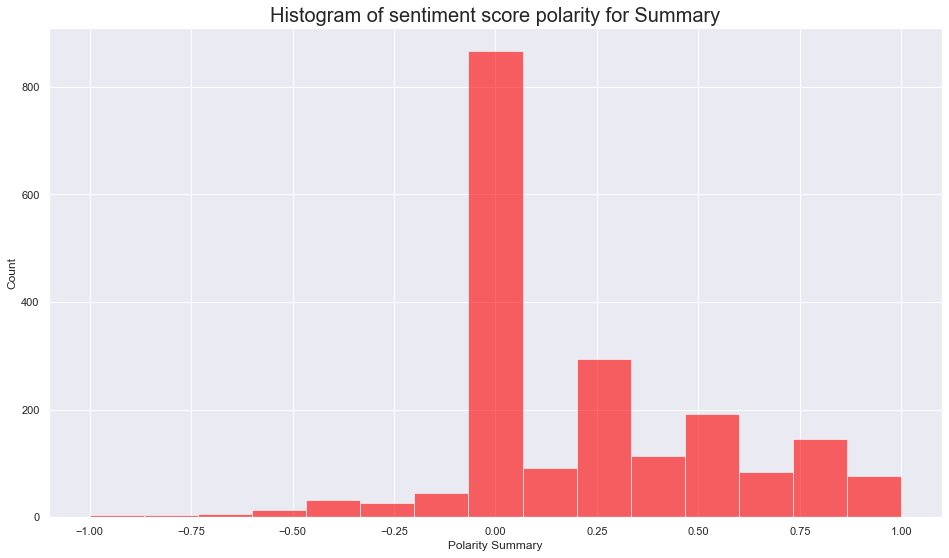

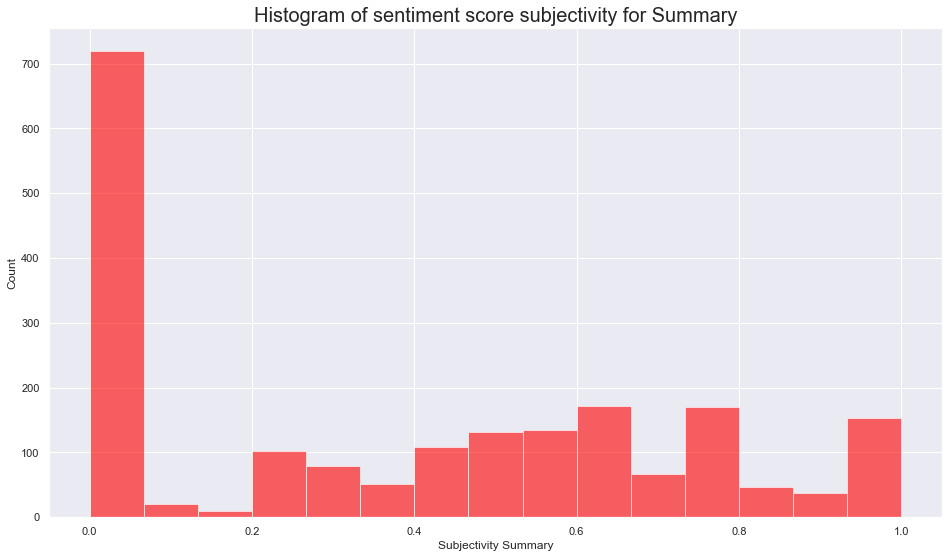

In [271]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['polarity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity Summary', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for Summary', fontsize=20)

plt.show();

# Histogram of sentiment score
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['subjectivity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity Summary', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity for Summary', fontsize=20)

plt.show();

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [189]:
# Import the vader classs and create a object of the analyzer called Darth Vader.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
darth_vader = SentimentIntensityAnalyzer()

In [238]:
#Create lists from the reviews and summaries
review_lists = df4['review'].values
summary_lists = df4['summary'].values

In [251]:
#View an item from each
review_lists[0], summary_lists[0]

('when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely',
 'the fact that 50 of this space is wasted on art and not terribly informative or needed art ')

In [254]:
#Setniment analysis Reviews
review_sentiment =\
{"".join(_) : darth_vader.polarity_scores("".join(_)) for _ in review_lists}

In [259]:
len(review_sentiment)

1950

In [260]:
#Setniment analysis Summary
summary_sentiment =\
{"".join(_) : darth_vader.polarity_scores("".join(_)) for _ in summary_lists}

In [261]:
len(review_sentiment)

1950

In [262]:
# Convert the list of dictionary results to a pandas dataframe. 
# The index is the cleaned review.
review_sentiment_df = pd.DataFrame(review_sentiment).T

# View the DataFrame.
review_sentiment_df

,neg,neu,pos,compound
when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely,0.108,0.833,0.059,-0.6333
an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens,0.101,0.695,0.205,0.9404
nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the adventure in question as well as use in a broader sense the rage of demons screen is far more useful for broad under dark adventuring covering a lot of rules for the various conditions you may suffer and the map is only one panel this storm giants one is decent for a few tables it includes but really misses the mark maybe they should ask a few dms what they would use,0.136,0.711,0.153,-0.0045
amazing buy bought it as a gift for our new dm and its perfect,0.000,0.490,0.510,0.8860
as my review of gf9s previous screens these were completely unnecessary and nearly useless skip them this is the definition of a waste of money,0.203,0.797,0.000,-0.6808
...,...,...,...,...
we are retired and find this a great way to stay alert in our spelling and vocabulary we also need to use math to keep score a great game for the brain,0.000,0.693,0.307,0.9178
the perfect word game for mixed ages with mom perhaps giving a little help to the 7 yr old we ages 80 to 8 love it,0.000,0.599,0.401,0.9137
great game did not think i would like it when first received but has turned out to be a lot of fun and we play regularly this order was for an extra set so we can always have it in our travel stuff,0.032,0.760,0.208,0.8606
great game for all keeps the mind nimble,0.000,0.631,0.369,0.6249


In [263]:
# The index is the cleaned summary.
summary_sentiment_df = pd.DataFrame(summary_sentiment).T

# View the DataFrame.
summary_sentiment_df

,neg,neu,pos,compound
the fact that 50 of this space is wasted on art and not terribly informative or needed art,0.145,0.723,0.132,-0.0711
another worthless dungeon masters screen from galeforce9,0.326,0.674,0.000,-0.4404
pretty but also pretty useless,0.306,0.165,0.529,0.4019
five stars,0.000,1.000,0.000,0.0000
money trap,0.697,0.303,0.000,-0.3182
...,...,...,...,...
this is a fun card game for people who like words,0.000,0.580,0.420,0.7003
sort of a card game equivalent of scrabble and a lot easier,0.000,0.763,0.237,0.4215
great game to keep the mind active,0.000,0.424,0.576,0.7783
a great mind game,0.000,0.328,0.672,0.6249


In [266]:
# Top 20 negative reviews.
review_sentiment_df.sort_values('neg', ascending=0).head(20)

,neg,neu,pos,compound
difficult,1.000,0.000,0.000,-0.3612
incomplete kit very disappointing,0.538,0.462,0.000,-0.5413
no more comments,0.524,0.476,0.000,-0.2960
a crappy cardboard ghost of the original hard to believe they did this but they did shame on hasbro disgusting,0.487,0.455,0.058,-0.9052
not a hard game to learn but not easy to win,0.470,0.456,0.075,-0.7946
i found the directions difficult,0.455,0.545,0.000,-0.3612
who doesnt love puppies great instructions pictures fun,0.445,0.334,0.221,-0.5207
different kids had red faces not sure they like,0.368,0.632,0.000,-0.4717
got the product in damaged condition,0.367,0.633,0.000,-0.4404
i bought this thinking it would be really fun but i was disappointed its really messy and it isnt nearly as easy as it seems also the glue is useless for a 9 year old the instructions are very difficult,0.362,0.592,0.045,-0.9520


In [267]:
# Top 20 negative summaries.
summary_sentiment_df.sort_values('neg', ascending=0).head(20)

,neg,neu,pos,compound
disappointed,1.000,0.000,0.0,-0.4767
boring,1.000,0.000,0.0,-0.3182
disappointing,1.000,0.000,0.0,-0.4939
frustrating,1.000,0.000,0.0,-0.4404
meh,1.000,0.000,0.0,-0.0772
defective poor qc,0.857,0.143,0.0,-0.7184
not great,0.767,0.233,0.0,-0.5096
mad dragon,0.762,0.238,0.0,-0.4939
no 20 sided die,0.753,0.247,0.0,-0.7269
damaged product,0.744,0.256,0.0,-0.4404


In [268]:
# Top 20 positive reviews.
review_sentiment_df.sort_values('pos', ascending=0).head(20)

,neg,neu,pos,compound
entertaining,0.0,0.0,1.0,0.4404
fun gift,0.0,0.0,1.0,0.7351
ok,0.0,0.0,1.0,0.2960
cool,0.0,0.0,1.0,0.3182
great,0.0,0.0,1.0,0.6249
fantastic,0.0,0.0,1.0,0.5574
satisfied thanks,0.0,0.0,1.0,0.6908
awesome,0.0,0.0,1.0,0.6249
satisfied,0.0,0.0,1.0,0.4215
nice,0.0,0.0,1.0,0.4215


In [269]:
# Top 20 positive summaries.
summary_sentiment_df.sort_values('pos', ascending=0).head(20)

,neg,neu,pos,compound
wonderful,0.0,0.0,1.0,0.5719
awesome,0.0,0.0,1.0,0.6249
nifty,0.0,0.0,1.0,0.4019
brilliant,0.0,0.0,1.0,0.5859
thanks,0.0,0.0,1.0,0.4404
good,0.0,0.0,1.0,0.4404
great helper,0.0,0.0,1.0,0.7579
great gift,0.0,0.0,1.0,0.7906
great,0.0,0.0,1.0,0.6249
super cute,0.0,0.0,1.0,0.7845


## 7. Discuss: Insights and observations

***In order to check for duplicate reviews, I took into consideration product number, gender and age additionally to contents in review column and its summary since there was no standard identification for customers. There were only two observations with identical values on these fields, so I only deleted 1 duplicate. I kept the observation with higher loyalty points and spending score, as that’s more valuable customers. The output of WordClouds demonstrates a slight tendency towards the positive rather negative side. The polarity scores confirm that sentiment sits more on the positive side for both reviews and summaries. The top 20 negative and positive reviews and summaries, manifest that many customers are disappointed and find the games difficult, especially for kids. On the positive side, customer feedback is expressed concisely with less context towards excitement***

# 